In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import pearsonr 
from scipy.stats import spearmanr
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
#READING FILE
dec_city   =   pd.read_csv('../Dataset/Decadal_air_data_cities.csv')
dec_st     =   pd.read_csv('../Dataset/Decadal_Air_data_states.csv')
indus      =   pd.read_csv('../Dataset/Industries_2011_2020.csv')
motor_veh  =   pd.read_csv('../Dataset/MotorVehicles_2011_2020.csv')
population =   pd.read_csv('../Dataset/Population_2011_2020.csv') 

In [ ]:
st = dec_st.State.unique()
ct_st = dec_city.State.unique()
ind_st = indus.State.unique()   
mt_st = motor_veh.State.unique() 
pop_st = population.State.unique() 

In [ ]:
dec_st

,State,year,SO2,NO2,PM2.5
0,Andhra Pradesh,2011,6.917445,14.339150,70.653459
1,Andhra Pradesh,2012,7.021031,14.911603,72.703588
2,Andhra Pradesh,2013,7.067833,15.658970,70.840641
3,Andhra Pradesh,2014,7.587378,18.105960,73.421301
4,Andhra Pradesh,2015,7.205587,21.808934,74.846019
...,...,...,...,...,...
305,West Bengal,2016,6.975688,44.003759,83.476065
306,West Bengal,2017,6.064500,43.122708,67.246463
307,West Bengal,2018,5.153311,42.241656,51.016861
308,West Bengal,2019,4.097365,40.934686,32.767220


In [ ]:
dec_st.shape,indus.shape

((310, 5), (310, 3))

In [ ]:
population.head()

,State,year,Population
0,ANDHRA PRADESH,2011,84580777
1,ANDHRA PRADESH,2012,85466838
2,ANDHRA PRADESH,2013,86362181
3,ANDHRA PRADESH,2014,87266904
4,ANDHRA PRADESH,2015,88181105


In [ ]:
#CREATING A DATAFRAME CONSISTING OF ONLY REQUIRED COLUMNS FROM ALL CSV FILES
df = dec_st[['year','SO2', 'NO2', 'PM2.5']]        #FROM STATEDATA
df['noi'] = indus['Number']                       #FROM INSUSTRIES
df['nom'] = motor_veh['Number']                   #FROM MoTOR VEHC
df['pop'] = population['Population']              #FROM CENSUS POP
df

,year,SO2,NO2,PM2.5,noi,nom,pop
0,2011,6.917445,14.339150,70.653459,17.0,69.0,84580777
1,2012,7.021031,14.911603,72.703588,18.0,77.0,85466838
2,2013,7.067833,15.658970,70.840641,24.0,85.0,86362181
3,2014,7.587378,18.105960,73.421301,20.0,94.0,87266904
4,2015,7.205587,21.808934,74.846019,20.0,102.0,88181105
...,...,...,...,...,...,...,...
305,2016,6.975688,44.003759,83.476065,9365.0,24203.0,10994110
306,2017,6.064500,43.122708,67.246463,9618.0,25887.0,11185253
307,2018,5.153311,42.241656,51.016861,9871.0,27571.0,11379719
308,2019,4.097365,40.934686,32.767220,10124.0,29255.0,11577565


In [ ]:
label = ['Year', 'SO2', 'NO2', 'PM2.5', 'Indust', 'vehicles', 'Population']

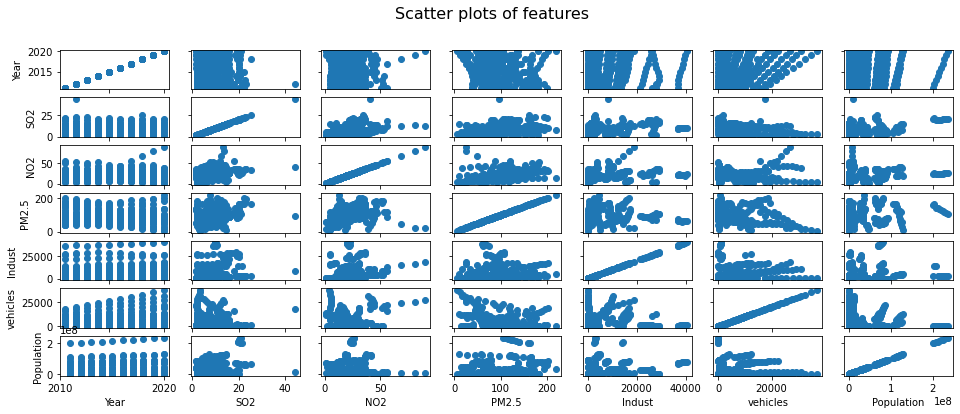

In [ ]:
#scatter plots
fig = plt.figure(0,figsize=(16,6))
fig.suptitle('Scatter plots of features', fontsize=16)

for i in range(df.shape[1]):            # through columns
    for j in range(df.shape[1]):
        ax = plt.subplot2grid((7,7), (i,j))
        ax.scatter(df.iloc[:,j], df.iloc[:,i])
        
        if j==0:
            ax.set_ylabel(label[i])
        if i==6:
            ax.set_xlabel(label[j])
            if j==0:
                ax.set_xticks([2010,2020])
        if j!=0 and i!=6:
            ax.axes.xaxis.set_ticklabels([])
            ax.axes.yaxis.set_ticklabels([])
        if j==0 and i!=6:
            #x_axis = ax.axes.get_xaxis()
            #x_axis.set_visible(False)
            ax.axes.xaxis.set_ticklabels([])
        if i==6 and j!=0:
            #y_axis = ax.axes.get_yaxis()
            #y_axis.set_visible(False)
            ax.axes.yaxis.set_ticklabels([])
    
fig.savefig('../Images/Correlaton_Scatterplots.png')
plt.show()

### CORRELATION

In [ ]:
corr_pearson = []                    
corr_spearman = []
for i in range(df.shape[1]):            # ITERATING THROUGH EACH COLUMN
    tp = []                 #STORING COEFFICICENTS in a LIST
    ts=[]
    for j in range(df.shape[1]):         # AND CALCULATING WITH EACH COLUMN
        cr1,p1 = pearsonr(df.iloc[:,i],df.iloc[:,j])                 # CALCULATING PEARSON COEFFICICENTS
        tp.append(round(cr1,4))
        
        cr2,p2 = spearmanr(df.iloc[:,i],df.iloc[:,j])                 # CALCULATING SPEARMAN COEFFICICENTS
        ts.append(round(cr2,4))
        
    corr_pearson.append(tp)
    corr_spearman.append(ts)

CORRELATION MATRIX

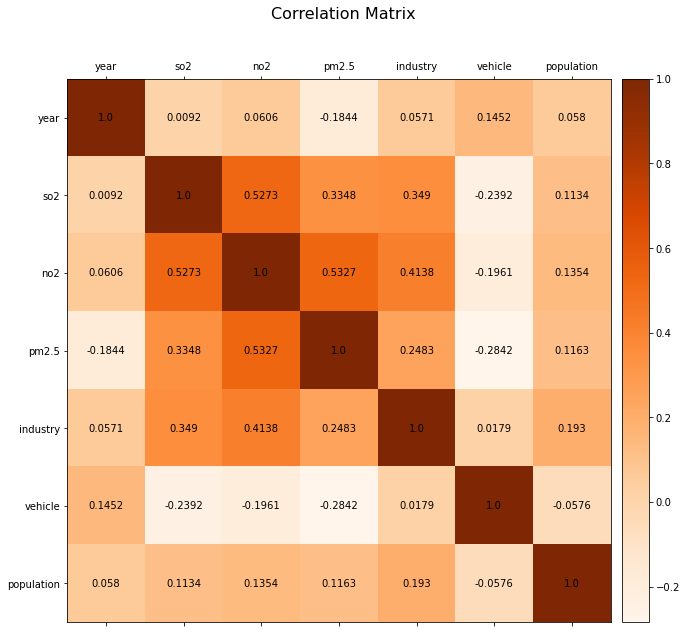

In [ ]:
L = corr_spearman
count = 0

label = ['year', 'so2', 'no2', 'pm2.5', 'industry', 'vehicle', 'population']

fig, ax = plt.subplots(figsize=(16,10))
fig.suptitle('Correlation Matrix', fontsize=16)

min_val, max_val = 0, 7

im = ax.matshow(L, cmap=plt.cm.Oranges)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.15)

for i in range(7):
    for j in range(7):
        c = L[j][i]
        ax.text(i,j, str(c), va='center', ha='center')
        ax.set_xticklabels(['']+label)
        ax.set_yticklabels(['']+label)

fig.colorbar(im, cax=cax, orientation='vertical')
fig.savefig('../Images/Correlation_Matrix.png')
plt.show()

### COAL PRODUCTION AND COAL CONSUMPTION IN INDIA

In [ ]:
coal_prod  =   pd.read_csv(r'../Dataset/Coal_Production_2011_2020.csv')
coal_cons  =   pd.read_csv(r'../Dataset/Industrial_Coal_Consumption_2011_2020.csv')

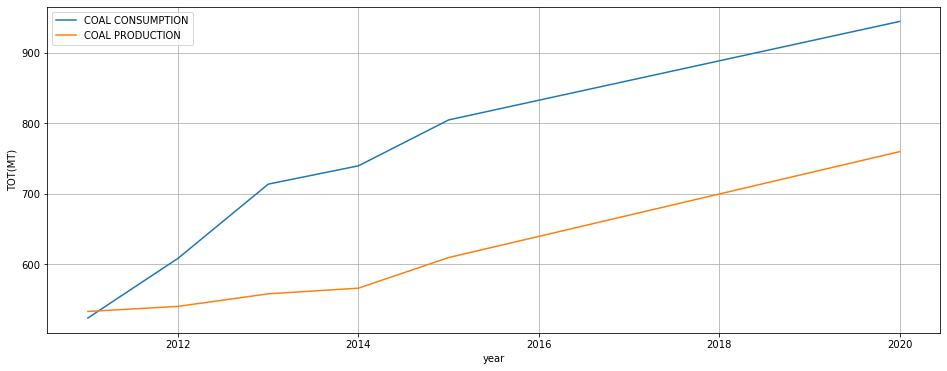

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(x = coal_cons['year'],y=coal_cons['TOT(MT)'])
sns.lineplot(x = coal_cons['year'],y=coal_prod['TOT(MT)'])
plt.grid(True)
plt.legend(['COAL CONSUMPTION','COAL PRODUCTION'])
plt.savefig('../Images/Coal_prod_cons.png')